In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow


In [ ]:
uploaded = files.upload()

Saving uk_road.jpg to uk_road (1).jpg


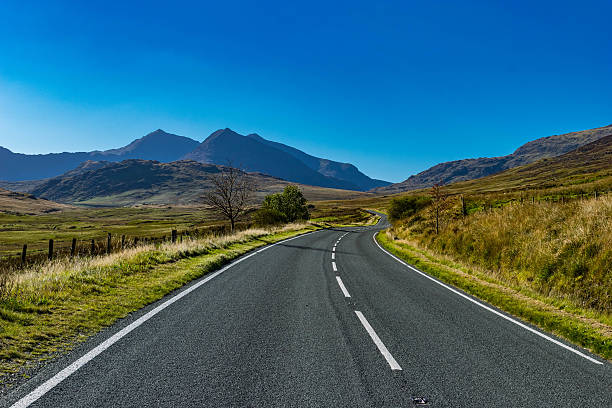

(408, 612, 3)

In [ ]:
image = cv2.imread('uk_road.jpg')
cv2_imshow(image)
image.shape

**CONVERT TO GRAYSCALE**

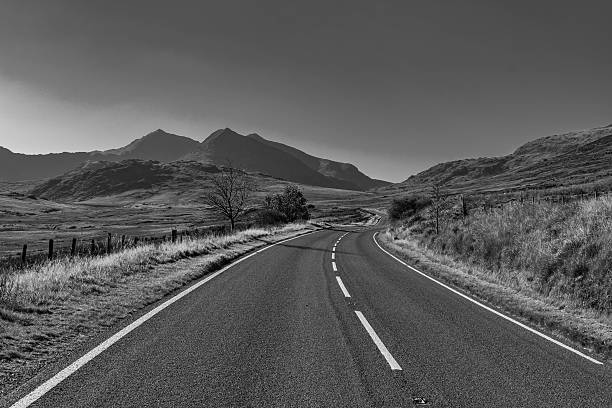

(408, 612)

In [ ]:
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_g)
image_g.shape

**Gaussian Blur and Canny**

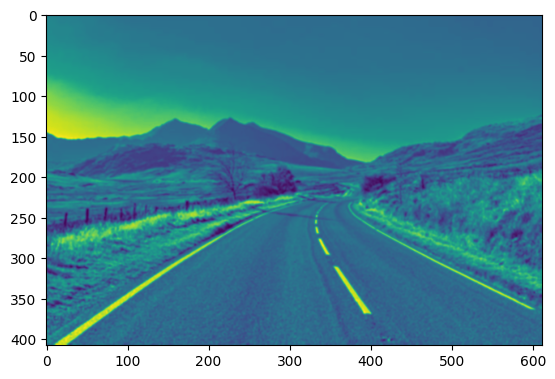

In [ ]:
image_blur = cv2.GaussianBlur(image_g, (5, 5), 0)
plt.imshow(image_blur)

**Cannny Edge detection**

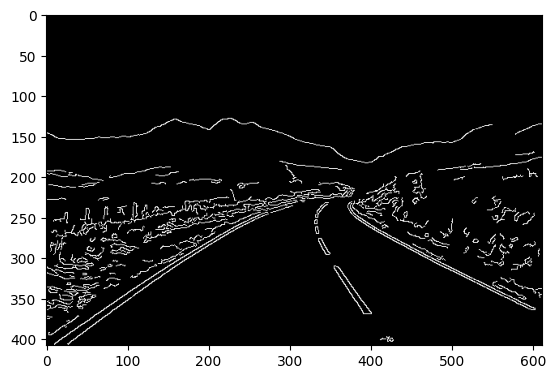

In [ ]:
threshold_1 = 100
threshold_2 = 200
image_canny = cv2.Canny(image_blur, threshold_1, threshold_2)
plt.imshow(image_canny, cmap='gray')


**Region of Interest**

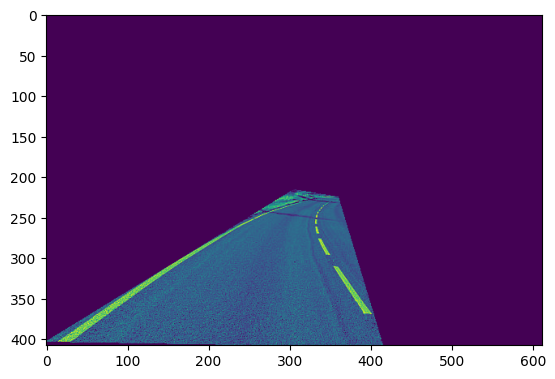

In [ ]:
vertices = np.array([[(0, 403),(305,216),(360,225),(415,410)]],dtype=np.int32)
mask = np.zeros_like(image_g)
mask_color = 255
cv2.fillPoly(mask, vertices, mask_color)
masked_image = cv2.bitwise_and(image_g, mask)
plt.imshow(masked_image)

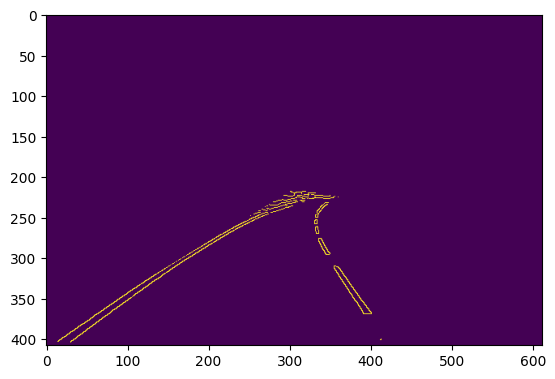

In [ ]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.imshow(masked_image)


In [ ]:
rho =2
theta = np.pi/180
threshold = 40
min_line_length =20
max_line_gap = 4
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
line_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
lines


array([[[ 30, 403, 146, 319]],

       [[177, 295, 231, 262]],

       [[162, 308, 242, 260]],

       [[ 14, 403, 107, 338]],

       [[359, 311, 401, 369]],

       [[355, 313, 391, 369]],

       [[106, 339, 143, 316]],

       [[217, 271, 245, 255]],

       [[156, 312, 188, 293]],

       [[246, 255, 271, 244]],

       [[ 19, 400,  58, 373]],

       [[254, 254, 295, 238]],

       [[271, 242, 307, 231]],

       [[121, 329, 152, 310]],

       [[362, 313, 386, 347]],

       [[339, 276, 349, 296]],

       [[332, 247, 336, 270]],

       [[366, 329, 393, 369]]], dtype=int32)

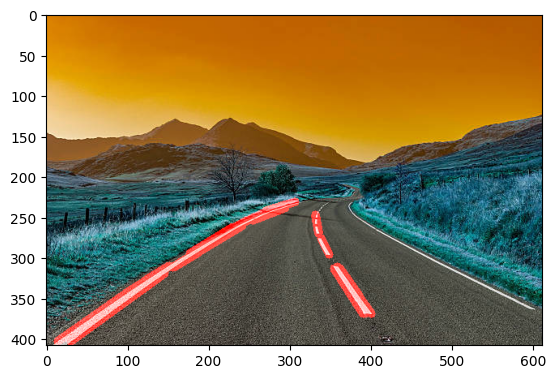

In [ ]:
α = 1
β = 1
γ = 0

image_with_lines = cv2.addWeighted(image, α, line_image, β, γ)
plt.figure()
plt.imshow(image_with_lines)